In [66]:
import pandas as pd
import math
from statistics import mode 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [45]:
df=pd.read_csv('glass.data',header=None,names=['Id number','RI','Sodium','Magnesium','Aluminium','Silicon','Potassium','Calcium','Barium','Iron','Type of glass'])
y=df['Type of glass']
data=df.copy()
df.drop(['Type of glass','Id number'], inplace=True, axis=1)
df

,RI,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [46]:
scaler = StandardScaler()
df=pd.DataFrame(data=scaler.fit_transform(df),columns=df.columns)
df

,RI,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [47]:
from sklearn.cluster import KMeans
length=int(np.sqrt(df.shape[0]))
summations=[]
for k in range(2,30):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df)
    summations.append(kmeans.inertia_)

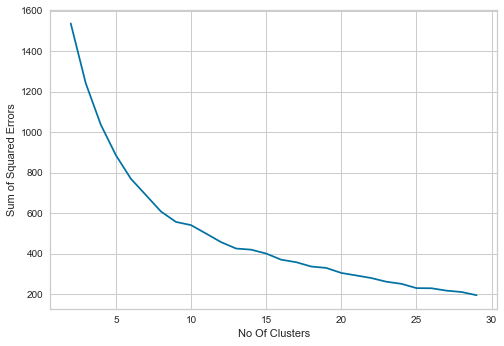

In [48]:
plt.plot(range(2,30),summations)
plt.xlabel('No Of Clusters') 
plt.ylabel('Sum of Squared Errors')
plt.show()

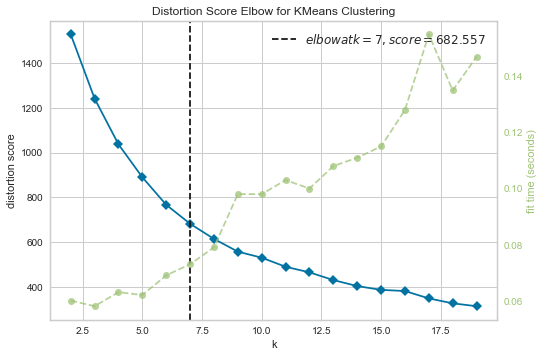

In [49]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [50]:
kmeans = KMeans(n_clusters=8).fit(df)

In [51]:
clusteredIndices=pd.Series(data=[np.where(kmeans.labels_==i) for i in np.unique(kmeans.labels_)],index=[i for i in np.unique(kmeans.labels_)])
clusteredData=pd.Series(data=[df.iloc[clusteredIndices[i]] for i in clusteredIndices.keys()],index=[i for i in np.unique(kmeans.labels_)])

In [52]:
groups=data.groupby('Type of glass').groups
for i in groups.keys():
    groups[i]=df.loc[groups[i]]
groups=pd.Series(groups)

In [53]:
groups

1              RI    Sodium  Magnesium  Aluminium  ...
2               RI    Sodium  Magnesium  Aluminium ...
3               RI    Sodium  Magnesium  Aluminium ...
5               RI    Sodium  Magnesium  Aluminium ...
6               RI    Sodium  Magnesium  Aluminium ...
7               RI    Sodium  Magnesium  Aluminium ...
dtype: object

In [54]:
indexes=pd.Series(data.groupby('Type of glass').groups)

Tht actual total number of clusters or groups are 6 signifying six types of glasses.But our clustering algorithm return 8 as an eblow point and hence we cluster it and get 8 clusters.
Since the elbow point and actual groups aren't the same it gives us a few inferences:
1)K means clustering isn't a suitable algorithm for this dataset to cluster it and group it on the basis of these attributes.
2)We need more attributes to group and cluster it effectively if we choose K means.
3)The K means  algorithm returns us clusters which aren't the actual groups which tells us that we need more information to group it or cluster it effectively.In short we need more attributes to cluster it efficenty since there could be some conditions which or some attributes which could play a huge role in the finding out the type of glass but aren't listed down.

In [55]:
for j in clusteredIndices.keys():
    clusteredIndices[j]=(np.asarray(clusteredIndices[j][0]))

In [56]:
accuracyFrame=pd.DataFrame()
row=0
for i in indexes:
    column=0
    for j in clusteredIndices:
        accuracyFrame.set_value(column,row,len(np.intersect1d(i,j)))
        column=column+1
    row=row+1   

C:\Users\Trivikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [57]:
accuracyFrame

,0,1,2,3,4,5
0,35.0,42.0,12.0,0.0,1.0,1.0
1,0.0,4.0,0.0,9.0,3.0,0.0
2,0.0,0.0,0.0,0.0,2.0,22.0
3,23.0,3.0,2.0,0.0,3.0,2.0
4,0.0,0.0,0.0,1.0,0.0,4.0
5,0.0,0.0,0.0,2.0,0.0,0.0
6,12.0,20.0,3.0,1.0,0.0,0.0
7,0.0,7.0,0.0,0.0,0.0,0.0


In [58]:
accuracyFrame.idxmax()

0    0
1    0
2    0
3    1
4    1
5    2
dtype: int64

In [78]:
range_n_clusters = range(2,20)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    clusterer.fit(df)
    cluster_labels=clusterer.labels_
    silhouette_avg = silhouette_score(df, cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.4218395222735016
For n_clusters = 3 The average silhouette_score is : 0.3671942443096349
For n_clusters = 4 The average silhouette_score is : 0.39096277943183233
For n_clusters = 5 The average silhouette_score is : 0.33542065013520944
For n_clusters = 6 The average silhouette_score is : 0.3210572568440084
For n_clusters = 7 The average silhouette_score is : 0.33851149025249655
For n_clusters = 8 The average silhouette_score is : 0.3565331127690803
For n_clusters = 9 The average silhouette_score is : 0.3569339846950012
For n_clusters = 10 The average silhouette_score is : 0.29616465721652613
For n_clusters = 11 The average silhouette_score is : 0.30411259329344686
For n_clusters = 12 The average silhouette_score is : 0.3154421085911356
For n_clusters = 13 The average silhouette_score is : 0.33350438074287775
For n_clusters = 14 The average silhouette_score is : 0.2755643040251676
For n_clusters = 15 The average silhouette_score is :

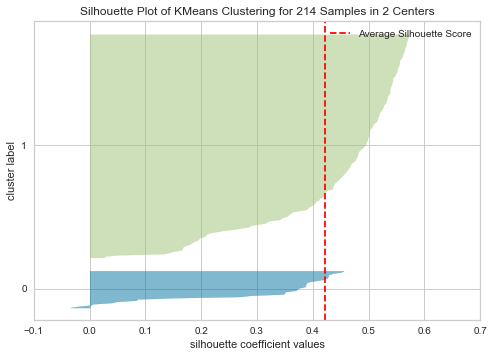

In [89]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(2,random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [76]:
trial=pd.DataFrame(data=([1,1],[1.5,2],[3,4],[5,7],[3.5,5],[4.5,5],[3.5,4.5]),columns=['A','B'])
trial

,A,B
0,1.0,1.0
1,1.5,2.0
2,3.0,4.0
3,5.0,7.0
4,3.5,5.0
5,4.5,5.0
6,3.5,4.5


In [79]:
trial=df

In [81]:
clusterer = KMeans(n_clusters=8, random_state=42)
clusterer.fit(trial)
labels=clusterer.predict(trial)
silhouetee_coeffiecent=silhouette_samples(trial, labels, metric='euclidean')
print("The Silhouetee's coeffiecents are :",silhouetee_coeffiecent)
silhouette_avg = silhouette_score(trial,labels,metric='euclidean')
print("The Silhouette score is :",silhouette_avg)

The Silhouetee's coeffiecents are : [ 0.21638502  0.51286536  0.5432945   0.6017911   0.58723224  0.40545194
  0.56518767  0.51993892  0.21944005  0.1498531   0.37212168  0.57808743
  0.38746236  0.23987871  0.51544354  0.54819392  0.51818106  0.43077903
 -0.06298118  0.38146827  0.32257134  0.26109867  0.57756919  0.58785848
  0.58116807  0.58749908  0.60852848  0.59985888  0.5270137   0.61125287
  0.08574656  0.52580481  0.4219829   0.34124738  0.55874042  0.56131846
 -0.11378053  0.56667705  0.4494761   0.4494761   0.52675328  0.52986318
  0.6130752   0.44980781  0.472956    0.23330815  0.20034059  0.44267423
  0.35132079  0.24823561  0.37414875 -0.1055606   0.5151426   0.53031327
  0.24242903  0.32965144  0.3148205   0.58117762  0.55754977  0.15336454
  0.31325377  0.03511787  0.38964796  0.4801579   0.37041616  0.25459901
  0.10544378  0.07727899  0.13896222  0.40868731  0.09065122  0.37902369
  0.56190562  0.58110438  0.55712027  0.56272352  0.54845922  0.59208371
 -0.04494621  0

In [92]:
kmeans = KMeans(n_clusters=2).fit(df)
clusteredIndices=pd.Series(data=[np.where(kmeans.labels_==i) for i in np.unique(kmeans.labels_)],index=[i for i in np.unique(kmeans.labels_)])
clusteredData=pd.Series(data=[df.iloc[clusteredIndices[i]] for i in clusteredIndices.keys()],index=[i for i in np.unique(kmeans.labels_)])
groups=data.groupby('Type of glass').groups
for i in groups.keys():
    groups[i]=df.loc[groups[i]]
groups=pd.Series(groups)
indexes=pd.Series(data.groupby('Type of glass').groups)
for j in clusteredIndices.keys():
    clusteredIndices[j]=(np.asarray(clusteredIndices[j][0]))
accuracyFrame=pd.DataFrame()
row=0
for i in indexes:
    column=0
    for j in clusteredIndices:
        accuracyFrame.set_value(column,row,len(np.intersect1d(i,j)))
        column=column+1
    row=row+1   
accuracyFrame

C:\Users\Trivikram\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


,0,1,2,3,4,5
0,0.0,1.0,0.0,3.0,3.0,26.0
1,70.0,75.0,17.0,10.0,6.0,3.0
